In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
import bias_functions
import text_extraction
import asyncio

In [156]:
#df = pd.read_csv('extracted_data.txt', names=['Name', 'Age', 'City', 'Gender', 'UG_College', 'PG_College', 'Degree', 'Current_Employer', 'Experience(in Yrs)'])

In [157]:
df = bias_functions.read_json_files('./uploads/parsed_json/')

In [158]:
df.head()

,gender,degree,institute,year,city,employer,experience,experience_range,keywords,age
0,NaN,Bachelor of Technology,UPTU,2002,Bareilly,Avida Technologies,0,GREATER THAN 10 YEAR,"[Sensitive, Functional Requirements Specificat...",0.0
1,Male,Bachelor of Engineering,College of Engineering and Technology,1993,Chennai,Mercantiler InfoTech pvt ltd,0,8-10 YEAR,"[Microsoft Visual Studio, User Experience Desi...",0.0
2,Male,Bachelor of Engineering,Bharathiyar University,1982,Bangalore,infinite computer solution,0,GREATER THAN 10 YEAR,"[Human Resources Management System, Hospital M...",1.0
3,NaN,Bachelor of Technology,Jawaharlal Nehru technological University,NaN,NaN,for Five,0,3-5 YEAR,"[Confident, Manhattan Warehouse Management Sys...",NaN
4,NaN,Master of Computer Applications,Telangana University,NaN,NaN,Cybage Software Pvt Ltd,0,GREATER THAN 10 YEAR,"[Hard Working, Independent, Mirroring, Potenti...",NaN


In [ ]:
df = df[df['gender'] != 'MALE']

In [159]:
df.shape

(108, 10)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            33 non-null     object 
 1   degree            97 non-null     object 
 2   institute         92 non-null     object 
 3   year              70 non-null     object 
 4   city              72 non-null     object 
 5   employer          102 non-null    object 
 6   experience        108 non-null    object 
 7   experience_range  108 non-null    object 
 8   keywords          108 non-null    object 
 9   age               70 non-null     float64
dtypes: float64(1), object(9)
memory usage: 8.6+ KB


In [161]:
def process_column(column):
    def process_value(value):
        if isinstance(value, str):
            value = value.strip()
            match = re.match(r'(\d+(\.\d+)?)\+', value)
            if match:
                return float(match.group(1))
            match = re.match(r'(\d+(\.\d+)?)\s*years?', value, re.IGNORECASE)
            if match:
                return float(match.group(1))
            if value.upper() == 'NULL':
                return np.nan
            try:
                return float(value)
            except ValueError:
                return np.nan  
        elif isinstance(value, (int, float)):
            return float(value)
        else:
            return np.nan  
    return column.apply(process_value)

In [162]:
df['experience'] = process_column(df['experience'])

In [163]:
def clean_column(column):
    def clean_value(value):
        if isinstance(value, str):
            value = value.strip()
            value = value.replace('"', '')
            if any(char.isdigit() for char in value):
                return np.nan
            if value == 'NULL' or value == 'India' or value == 'Gender' or value == 'City':
                return np.nan
        return value
    return column.apply(clean_value)

In [164]:
df['gender'] = clean_column(df['gender'])

In [165]:
def clean_and_convert_column(column):
    def clean_value(value):
        if pd.isna(value): 
            return value
        value = str(value).strip() 
        try:
            return float(value)
        except ValueError:
            if any(char.isdigit() for char in value):
                try:
                    return float(value)
                except ValueError:
                    return np.nan
            else:
                return np.nan
    return column.apply(clean_value)

In [166]:
df['age'] = clean_and_convert_column(df['age'])

In [167]:
df['city'] = clean_column(df['city'])

In [168]:
df['employer'] = clean_column(df['employer'])
df['degree'] = clean_column(df['degree'])
df['institute'] = clean_column(df['institute'])

In [169]:
df.head()

,gender,degree,institute,year,city,employer,experience,experience_range,keywords,age
0,NaN,Bachelor of Technology,UPTU,2002,Bareilly,Avida Technologies,0.0,GREATER THAN 10 YEAR,"[Sensitive, Functional Requirements Specificat...",0.0
1,Male,Bachelor of Engineering,College of Engineering and Technology,1993,Chennai,Mercantiler InfoTech pvt ltd,0.0,8-10 YEAR,"[Microsoft Visual Studio, User Experience Desi...",0.0
2,Male,Bachelor of Engineering,Bharathiyar University,1982,Bangalore,infinite computer solution,0.0,GREATER THAN 10 YEAR,"[Human Resources Management System, Hospital M...",1.0
3,NaN,Bachelor of Technology,Jawaharlal Nehru technological University,NaN,NaN,for Five,0.0,3-5 YEAR,"[Confident, Manhattan Warehouse Management Sys...",NaN
4,NaN,Master of Computer Applications,Telangana University,NaN,NaN,Cybage Software Pvt Ltd,0.0,GREATER THAN 10 YEAR,"[Hard Working, Independent, Mirroring, Potenti...",NaN


In [170]:
text[0]

"gender: nan\ndegree: Bachelor of Technology\ninstitute: UPTU\nyear: 2002\ncity: Bareilly\nemployer: Avida Technologies\nexperience: 0.0\nexperience_range: GREATER THAN 10 YEAR\nkeywords: ['Sensitive', 'Functional Requirements Specification', 'Database Design and Implementation', 'SQL Server Integration Services', 'Software Development Life Cycle', 'Data Transformation Services', 'Microsoft Enterprise Library', 'Requirement Specifications', 'Design and Implementation', 'Designing Architecture', 'Gathering Requirements', 'Object Oriented Design', 'Requirements Gathering', 'Business Requirements', 'MS Enterprise Library', 'Project Deliverables', 'Software Development', 'Improve Performance', 'SQL Server Database', 'Material Selection', 'Crystal Reports 9', 'Data Access Layer', 'High-Level Design', 'Operating Systems', 'Stored Procedures', 'Database Caching', 'Entity Framework', 'Full Text Search', 'Software Upgrade', 'Coding Standard', 'Design Patterns', 'Infragistics UI', 'SQL Server 20

In [171]:
jd = """Landis+Gyr is a leading global provider of integrated energy management solutions. We measure and analyze energy utilization to generate empowering analytics for smart grid and infrastructure management, enabling utilities and consumers to reduce energy consumption. Our innovative and proven portfolio of software, services and intelligent sensor technology is a key driver to decarbonize the grid. With sales of USD 1.7 billion in FY 2022, Landis+Gyr employs over 7,000 talented people across 30 countries and five continents.

For more than a century, we've been pioneers in energy innovation, and we continue to lead the way toward a more sustainable and efficient energy landscape.

Join us at Landis+Gyr, where we manage energy better - since 1896.

Key Purpose of Role:

This role has responsiblity for development and expected to work in all areas of software engineering ( design, implement, review, document, test, support) as the demand dictates.

Experience Required: 3-10 years

Areas of Responsibility / Tasks:
• To design And Develop Applications software, APIs and enhancement in existing functionality.
• Involvement In Software Development Life-Cycle Activities (requirement gathering, elaboration, solicit clarification, WBS, Estimations, documentation).
• To develop specifications including Functional Requirements, Use Cases and Business Rules, Detailed Design, Code, And Test Procedures As Part Of Agile/Iterative Project Team.
• Document, Train And Support Operations And Software Quality Assurance TeamsPerform Code Reviews
• To perform unit/Integration testing
• Database Design and Maintenance.
• To Setup/ Configure/ Troubleshoot test environment
• Identify the quality KPI’s and ensure the compliance at each stage.
• Object-Oriented programming skills, Strong in .NET concepts
• Technology proficiency, C# with Windows Forms, WPF
• Database (Oracle/ SQL Server/My SQL/MS Access)
• Experience With Common Design Patterns,Documentation
• Experience using Defect management, Source Code Managenent, REQUIREMENT Management tools (Rational/TFS/Devops/Other...)
• Serial Communication/Device Communication (RS232/RS485/RF/GSM/GPRS)/DLMS

We are thrilled that you’ve considered Landis+Gyr to be a part of your professional journey.  As a part of the Landis+Gyr family, employees are offered a comprehensive and competitive package of benefits including medical, dental and vision coverage, life insurance, and a 401(k)-retirement plan featuring a generous company match incentive.  Additionally, we offer three (3) weeks of Paid Time Off (PTO) as well as eleven (11) paid holidays.  We also offer a tuition reimbursement program, optional pet insurance, supplemental medical coverage and a host of other perks to ensure the health, wellness, and enrichment of our team members. 

Pay is in the range of XY per year. The position is eligible for a 401(k) match and consideration for an annual bonus. The actual base salary offered depends on a variety of factors, which may include, as applicable, the qualifications of the individual applicant for the position, years of relevant experience, specific and unique skills, level of education attained, and certifications or other professional licenses held.  All candidates are encouraged to apply. 

All qualified applicants will receive consideration for employment without regard to race, color, religion, sex, sexual orientation, gender identity, national origin, disability, or status as a protected veteran. 

Submit your application – it takes less than 5 minutes! We will review and if selected to move forward we will have a 15-30 minute introduction call to discuss mutual expectations. An interview with the hiring manager will be next followed by an interview with key stakeholders.

We stand for a workplace that nurtures growth, fosters connection, and embraces authenticity. We believe that fostering a community that values diversity isn't just a goal; it's a way of life. The true magic happens when a group of unique minds comes together – bring yours and #EnergizeYourCareer"""

In [172]:
url = 'https://dev.api.talentmarx.in/api/v1/ml/similarity/'

In [173]:
def create_info_text(df):
    strings = []
    for _, row in df.iterrows():
        s = ""
        keys = row.keys()
        for i, element in enumerate(row):
            s += keys[i] + ": " + str(element).strip() + "\n"
        strings.append(s)
    return strings

In [174]:
text = create_info_text(df)

In [175]:
text[0]

"gender: nan\ndegree: Bachelor of Technology\ninstitute: UPTU\nyear: 2002\ncity: Bareilly\nemployer: Avida Technologies\nexperience: 0.0\nexperience_range: GREATER THAN 10 YEAR\nkeywords: ['Sensitive', 'Functional Requirements Specification', 'Database Design and Implementation', 'SQL Server Integration Services', 'Software Development Life Cycle', 'Data Transformation Services', 'Microsoft Enterprise Library', 'Requirement Specifications', 'Design and Implementation', 'Designing Architecture', 'Gathering Requirements', 'Object Oriented Design', 'Requirements Gathering', 'Business Requirements', 'MS Enterprise Library', 'Project Deliverables', 'Software Development', 'Improve Performance', 'SQL Server Database', 'Material Selection', 'Crystal Reports 9', 'Data Access Layer', 'High-Level Design', 'Operating Systems', 'Stored Procedures', 'Database Caching', 'Entity Framework', 'Full Text Search', 'Software Upgrade', 'Coding Standard', 'Design Patterns', 'Infragistics UI', 'SQL Server 20

In [176]:
df['gender'].unique().tolist()

[nan, 'Male', 'Female', 'MALE']

In [177]:
df['gender'].value_counts()

gender
Male      28
Female     4
MALE       1
Name: count, dtype: int64

In [178]:
df['city'].value_counts()

city
Bangalore         11
Chennai            5
Hyderabad          5
Greater Noida      4
Mumbai             4
Bengaluru          4
Coimbatore         3
Pune               3
Ghaziabad          2
Kannur             2
Noida              2
Kottayam           1
CHENNAI            1
Theni              1
Phagwara           1
Delhi              1
Nagpur             1
Sultanpur          1
Tirunelveli Dt     1
Hyd                1
Karimnagar         1
Karur              1
Madurai            1
Bareilly           1
New Delhi          1
Jaipur             1
Ahmedabad          1
Jamshedpur         1
Patna              1
Gurugram           1
Anantapur          1
kakinada           1
Trichy             1
Erode              1
Dharuhera          1
Udumalpet          1
Tirupur            1
Name: count, dtype: int64

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            33 non-null     object 
 1   degree            97 non-null     object 
 2   institute         92 non-null     object 
 3   year              70 non-null     object 
 4   city              71 non-null     object 
 5   employer          101 non-null    object 
 6   experience        108 non-null    float64
 7   experience_range  108 non-null    object 
 8   keywords          108 non-null    object 
 9   age               70 non-null     float64
dtypes: float64(2), object(8)
memory usage: 8.6+ KB


In [180]:
df['gender'].unique()[0] == np.nan

False

In [181]:
def scale_score(x):
    return (x+1) / 2

In [182]:
def find_score(colname):
  for val in df[colname].unique().tolist():
    if 'nan' in str(val):
      continue
    temp_df = df.copy()
    temp_df[colname] = val
    resume_data = create_info_text(temp_df[['age', 'city', 'gender', 'institute', 'degree',
       'employer', 'experience']])
    data = {
      "queryDocumentString": jd,
      "documentStrings": resume_data
    }
    response = requests.post(url, json=data)
    scores = eval(response.text)['similarities']
    scores = list(map(scale_score, scores))
    df["Score_{}_{}".format(colname, val)] = scores
  return "Added Columns"

In [183]:
find_score('gender')

'Added Columns'

In [184]:
find_score('city')

'Added Columns'

In [185]:
find_score('institute')

C:\Users\shour\AppData\Local\Temp\ipykernel_22596\2781604765.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Score_{}_{}".format(colname, val)] = scores
C:\Users\shour\AppData\Local\Temp\ipykernel_22596\2781604765.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Score_{}_{}".format(colname, val)] = scores
C:\Users\shour\AppData\Local\Temp\ipykernel_22596\2781604765.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performan

'Added Columns'

In [186]:
find_score('employer')

C:\Users\shour\AppData\Local\Temp\ipykernel_22596\2781604765.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Score_{}_{}".format(colname, val)] = scores
C:\Users\shour\AppData\Local\Temp\ipykernel_22596\2781604765.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Score_{}_{}".format(colname, val)] = scores
C:\Users\shour\AppData\Local\Temp\ipykernel_22596\2781604765.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performan

'Added Columns'

In [187]:
find_score('degree')

C:\Users\shour\AppData\Local\Temp\ipykernel_22596\2781604765.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Score_{}_{}".format(colname, val)] = scores
C:\Users\shour\AppData\Local\Temp\ipykernel_22596\2781604765.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Score_{}_{}".format(colname, val)] = scores
C:\Users\shour\AppData\Local\Temp\ipykernel_22596\2781604765.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performan

'Added Columns'

In [188]:
df.head()

,gender,degree,institute,year,city,employer,experience,experience_range,keywords,age,...,Score_degree_Master of Computer Application,Score_degree_BACHELOR of ENGINEERING,Score_degree_Higher Secondary school Certificate,Score_degree_Bachelor of Arts,Score_degree_Bachelor of Computer Applications,Score_degree_Master of Science,Score_degree_Master of Commerce,Score_degree_Doctor of Medicine,Score_degree_Master of Technology,Score_degree_Master of Computer
0,NaN,Bachelor of Technology,UPTU,2002,Bareilly,Avida Technologies,0.0,GREATER THAN 10 YEAR,"[Sensitive, Functional Requirements Specificat...",0.0,...,0.594427,0.596819,0.596178,0.594128,0.597515,0.592949,0.592736,0.594020,0.593463,0.594084
1,Male,Bachelor of Engineering,College of Engineering and Technology,1993,Chennai,Mercantiler InfoTech pvt ltd,0.0,8-10 YEAR,"[Microsoft Visual Studio, User Experience Desi...",0.0,...,0.582245,0.568520,0.581182,0.578568,0.585827,0.568573,0.570859,0.583250,0.573819,0.579262
2,Male,Bachelor of Engineering,Bharathiyar University,1982,Bangalore,infinite computer solution,0.0,GREATER THAN 10 YEAR,"[Human Resources Management System, Hospital M...",1.0,...,0.622934,0.601444,0.621046,0.606161,0.630686,0.608349,0.611754,0.584972,0.616847,0.617145
3,NaN,Bachelor of Technology,Jawaharlal Nehru technological University,NaN,NaN,for Five,0.0,3-5 YEAR,"[Confident, Manhattan Warehouse Management Sys...",NaN,...,0.573648,0.550653,0.577383,0.563328,0.569598,0.567224,0.570334,0.561907,0.566622,0.565068
4,NaN,Master of Computer Applications,Telangana University,NaN,NaN,Cybage Software Pvt Ltd,0.0,GREATER THAN 10 YEAR,"[Hard Working, Independent, Mirroring, Potenti...",NaN,...,0.582926,0.571786,0.578173,0.574453,0.577421,0.581984,0.581716,0.570633,0.580841,0.580052


In [189]:
df.describe()

,experience,age,Score_gender_Male,Score_gender_Female,Score_gender_MALE,Score_city_Bareilly,Score_city_Chennai,Score_city_Bangalore,Score_city_Coimbatore,Score_city_Udumalpet,...,Score_degree_Master of Computer Application,Score_degree_BACHELOR of ENGINEERING,Score_degree_Higher Secondary school Certificate,Score_degree_Bachelor of Arts,Score_degree_Bachelor of Computer Applications,Score_degree_Master of Science,Score_degree_Master of Commerce,Score_degree_Doctor of Medicine,Score_degree_Master of Technology,Score_degree_Master of Computer
count,108.000000,70.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,...,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.009259,0.514286,0.583698,0.587968,0.583698,0.592519,0.587349,0.580995,0.590751,0.591687,...,0.587644,0.572188,0.584326,0.580205,0.587601,0.577809,0.581337,0.569136,0.580399,0.583188
std,0.096225,0.503405,0.019549,0.020953,0.019549,0.018851,0.019446,0.019421,0.019272,0.021393,...,0.020474,0.019329,0.020778,0.017931,0.021623,0.019722,0.019329,0.016593,0.019938,0.019766
min,0.000000,0.000000,0.520613,0.515094,0.520613,0.520623,0.499154,0.503173,0.524372,0.523406,...,0.510144,0.517166,0.508879,0.523415,0.514914,0.509079,0.501875,0.526168,0.505627,0.508201
25%,0.000000,0.000000,0.571447,0.575935,0.571447,0.585301,0.579618,0.572602,0.582079,0.581511,...,0.579033,0.561197,0.574701,0.570627,0.575778,0.567155,0.570846,0.556858,0.571721,0.573692
50%,0.000000,1.000000,0.587035,0.590124,0.587035,0.593081,0.587952,0.582039,0.593595,0.595366,...,0.588732,0.571132,0.583461,0.579902,0.588998,0.578762,0.582829,0.568318,0.581472,0.585612
75%,0.000000,1.000000,0.597278,0.602809,0.597278,0.604033,0.598736,0.593840,0.603210,0.604513,...,0.598777,0.585660,0.595479,0.589903,0.600918,0.590429,0.592854,0.581251,0.591296,0.595413
max,1.000000,1.000000,0.630105,0.636965,0.630105,0.635428,0.621289,0.617494,0.627908,0.632323,...,0.630105,0.631490,0.631813,0.619950,0.631527,0.617729,0.618721,0.604845,0.628441,0.627417


In [190]:
df.columns

Index(['gender', 'degree', 'institute', 'year', 'city', 'employer',
       'experience', 'experience_range', 'keywords', 'age',
       ...
       'Score_degree_Master of Computer Application',
       'Score_degree_BACHELOR of ENGINEERING',
       'Score_degree_Higher Secondary school Certificate',
       'Score_degree_Bachelor of Arts',
       'Score_degree_Bachelor of Computer Applications',
       'Score_degree_Master of Science', 'Score_degree_Master of Commerce',
       'Score_degree_Doctor of Medicine', 'Score_degree_Master of Technology',
       'Score_degree_Master of Computer'],
      dtype='object', length=224)

In [191]:
df[['Score_city_Bangalore', 'Score_city_Greater Noida']]

,Score_city_Bangalore,Score_city_Greater Noida
0,0.578923,0.593034
1,0.562698,0.576969
2,0.601444,0.610641
3,0.573158,0.574089
4,0.600472,0.599259
...,...,...
103,0.587082,0.607468
104,0.586583,0.590347
105,0.593326,0.591683
106,0.576692,0.582313


In [192]:
from scipy.stats import f_oneway

def is_biased():
    f_oneway(df['Score_gender_Male'], df['Score_gender_Female'])[1] < 0.05

is_biased()


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Columns: 224 entries, gender to Score_degree_Master of Computer
dtypes: float64(216), object(8)
memory usage: 189.1+ KB


['Score_gender_Male', 'Score_gender_Female', 'Score_gender_MALE']
[0.520612696185708, 0.515093557536602, 0.520612696185708]
[0.63010473549366, 0.636964961886406, 0.63010473549366]
[0.5836984893065635, 0.5879681589840738, 0.5836984893065635]
0.19636172010140687
['Score_institute_UPTU', 'Score_institute_College of Engineering and Technology', 'Score_institute_Bharathiyar University', 'Score_institute_Jawaharlal Nehru technological University', 'Score_institute_Telangana University', 'Score_institute_D.J. Academy', 'Score_institute_Visvesvaraya Technological University', 'Score_institute_HS MIC College of Technology', 'Score_institute_KAKATIYA UNIVERSITY', 'Score_institute_Anna university', 'Score_institute_Madras University', 'Score_institute_Bharathiar University', 'Score_institute_Sri Shakthi Institute of Engineering and Technology', 'Score_institute_Park College of Engineering & Technology', 'Score_institute_University of Anna University', 'Score_institute_Rajiv Gandhi Proudyogiki Vis

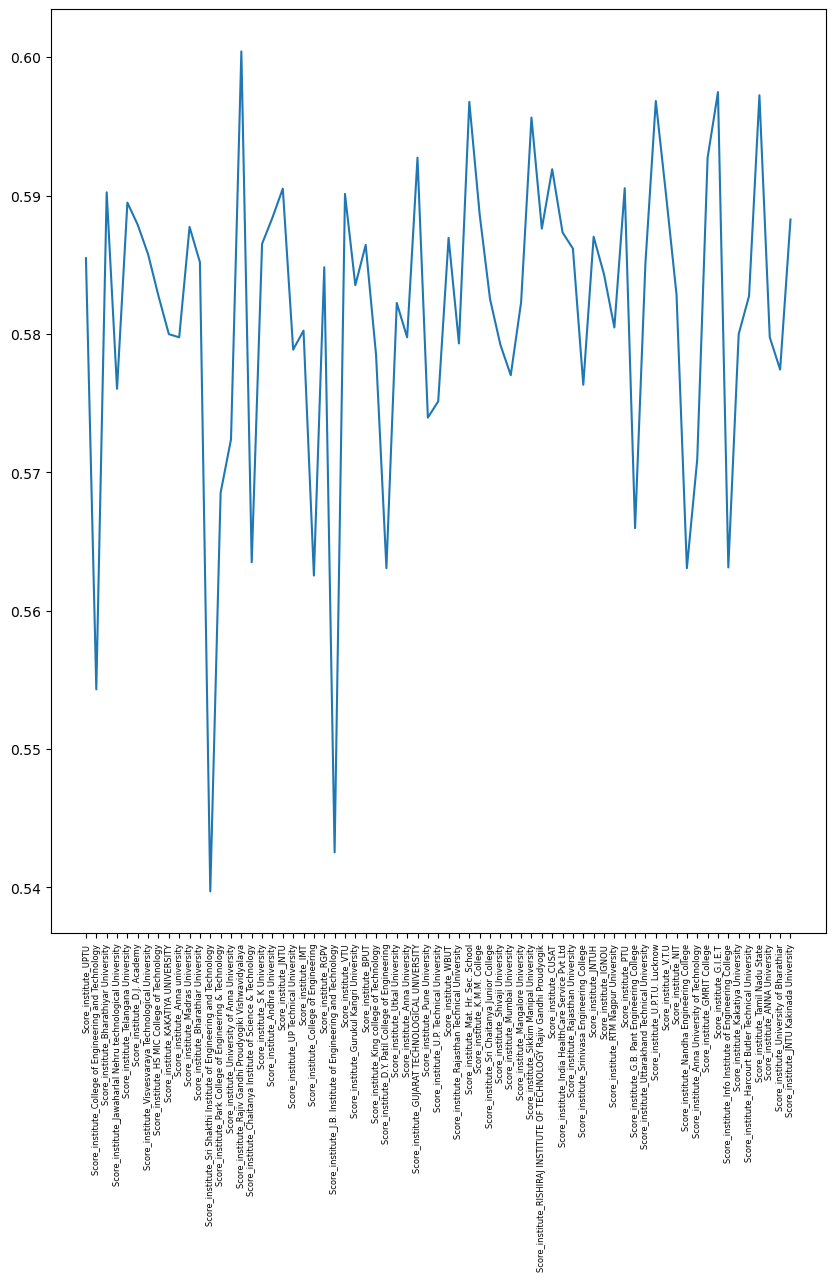

['Score_city_Bareilly', 'Score_city_Chennai', 'Score_city_Bangalore', 'Score_city_Coimbatore', 'Score_city_Udumalpet', 'Score_city_Dharuhera', 'Score_city_Erode', 'Score_city_Trichy', 'Score_city_kakinada', 'Score_city_Ghaziabad', 'Score_city_Gurugram', 'Score_city_Noida', 'Score_city_Patna', 'Score_city_Jamshedpur', 'Score_city_Bengaluru', 'Score_city_Ahmedabad', 'Score_city_Hyderabad', 'Score_city_New Delhi', 'Score_city_Jaipur', 'Score_city_Pune', 'Score_city_Kannur', 'Score_city_Mumbai', 'Score_city_Greater Noida', 'Score_city_CHENNAI', 'Score_city_Hyd', 'Score_city_Nagpur', 'Score_city_Phagwara', 'Score_city_Theni', 'Score_city_Kottayam', 'Score_city_Delhi', 'Score_city_Sultanpur', 'Score_city_Tirunelveli Dt', 'Score_city_Karimnagar', 'Score_city_Karur', 'Score_city_Madurai', 'Score_city_Tirupur']
[0.5206229258328676, 0.4991538655012846, 0.5031727203167975, 0.5243717841804028, 0.523406308144331, 0.51220284961164, 0.5176586881279945, 0.5138159561902285, 0.5121082505211234, 0.506712

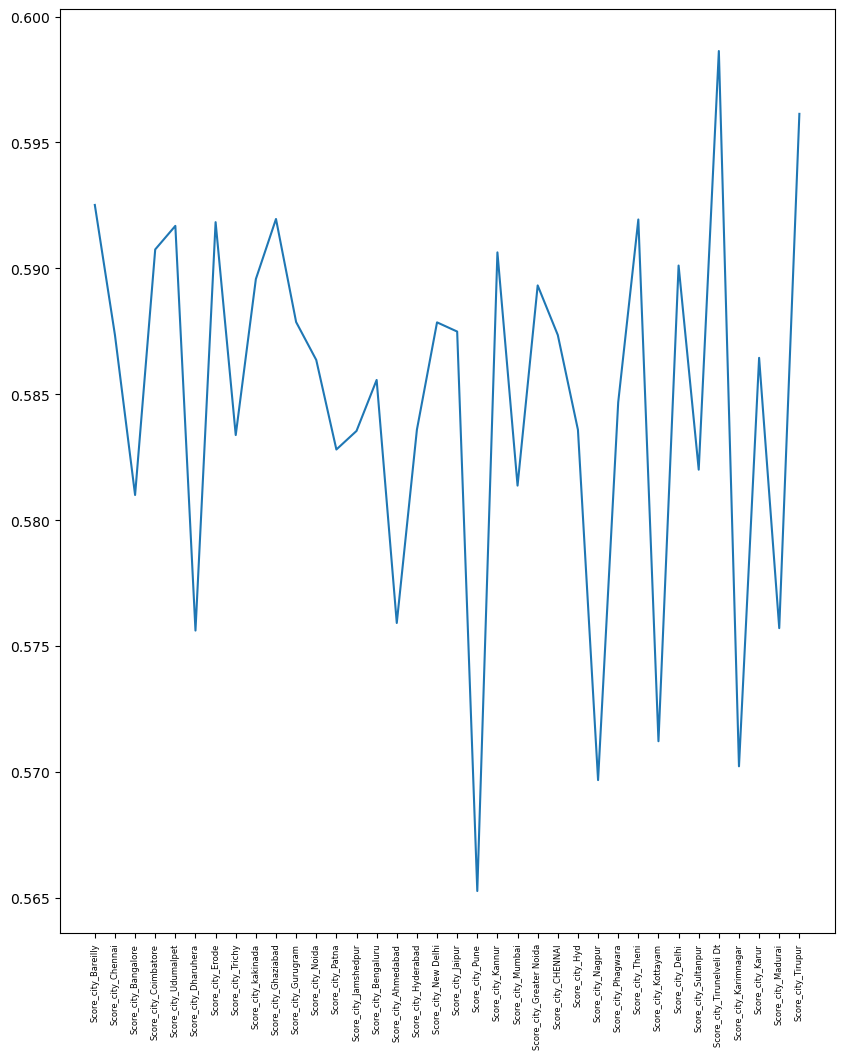

['Score_employer_Avida Technologies', 'Score_employer_Mercantiler InfoTech pvt ltd', 'Score_employer_infinite computer solution', 'Score_employer_for Five', 'Score_employer_Cybage Software Pvt Ltd', 'Score_employer_Cloudmine Technology', 'Score_employer_Nahar Technologies Pvt. Ltd.', 'Score_employer_Winjit Technologies Pvt Ltd, Bangalore in Dot Net', 'Score_employer_Life Systems', 'Score_employer_Infosys Ltd', 'Score_employer_Capgemini India Pvt Ltd', 'Score_employer_Span Technology Services', 'Score_employer_Attune Technologies', 'Score_employer_Netserv Technologies', 'Score_employer_Lakeba IT Solutions', 'Score_employer_Scientific Games', 'Score_employer_Genx Info Technologies Pvt Ltd.', 'Score_employer_APPSMINE INFOTECH', 'Score_employer_Alchemy Software Solutions Pvt Ltd', 'Score_employer_InEight India Pvt Ltd.', 'Score_employer_SVK systems Inc', 'Score_employer_CONCENTRIX', 'Score_employer_NexGen Analytics', 'Score_employer_WIPRO TECHNOLOGIES', 'Score_employer_Fiserv India Pvt Ltd

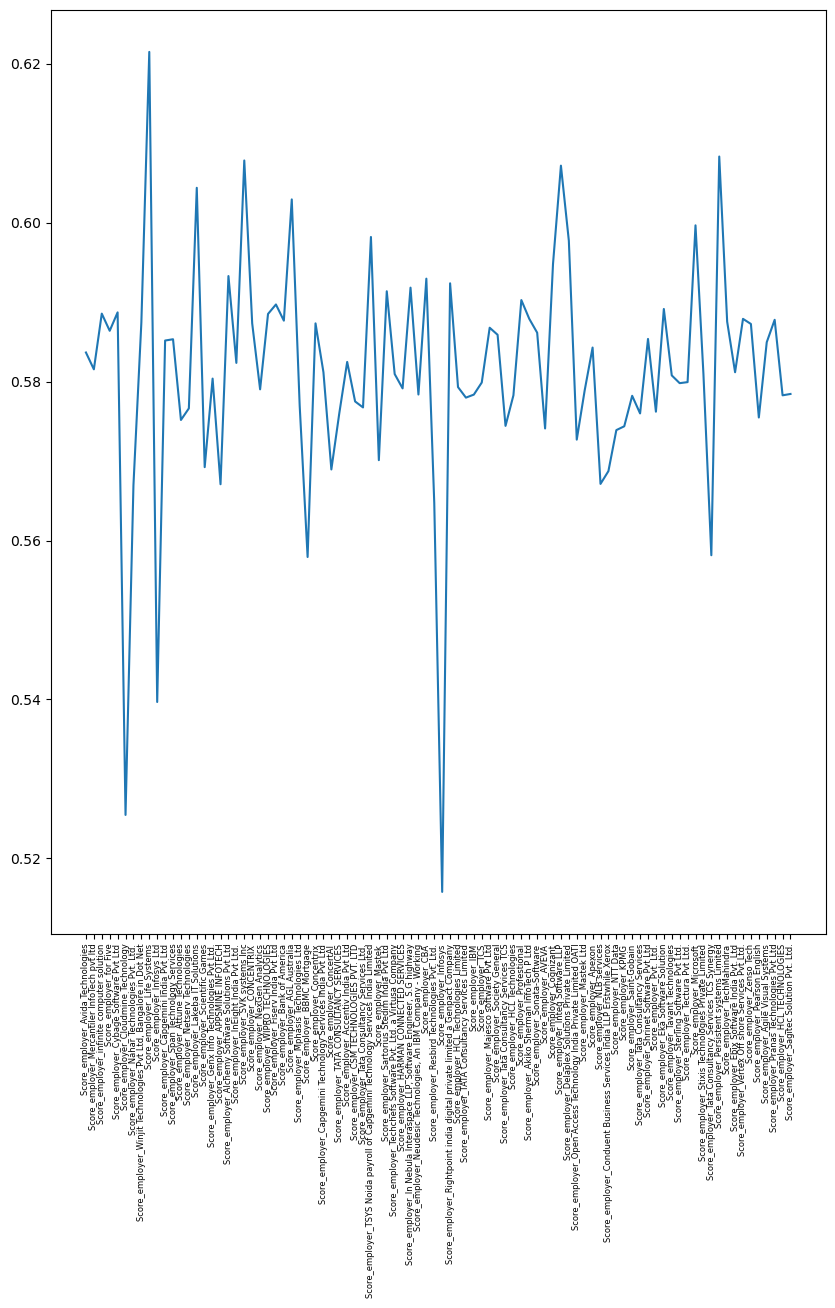

['Score_degree_Bachelor of Technology', 'Score_degree_Bachelor of Engineering', 'Score_degree_Master of Computer Applications', 'Score_degree_Bachelor of Science', 'Score_degree_Master of Business Administration', 'Score_degree_Bachelor of Computer Science', 'Score_degree_Master of Computer Application', 'Score_degree_BACHELOR of ENGINEERING', 'Score_degree_Higher Secondary school Certificate', 'Score_degree_Bachelor of Arts', 'Score_degree_Bachelor of Computer Applications', 'Score_degree_Master of Science', 'Score_degree_Master of Commerce', 'Score_degree_Doctor of Medicine', 'Score_degree_Master of Technology', 'Score_degree_Master of Computer']
[0.5111667662858963, 0.5171655081212521, 0.5078050130978227, 0.5145473778247833, 0.5010241307318211, 0.5179752465337515, 0.5101441461592913, 0.5171655081212521, 0.5088788326829672, 0.5234146751463413, 0.5149135664105415, 0.5090792812407017, 0.5018746824935079, 0.5261675789952278, 0.5056265145540237, 0.5082007739692926]
[0.6303454041481018, 0

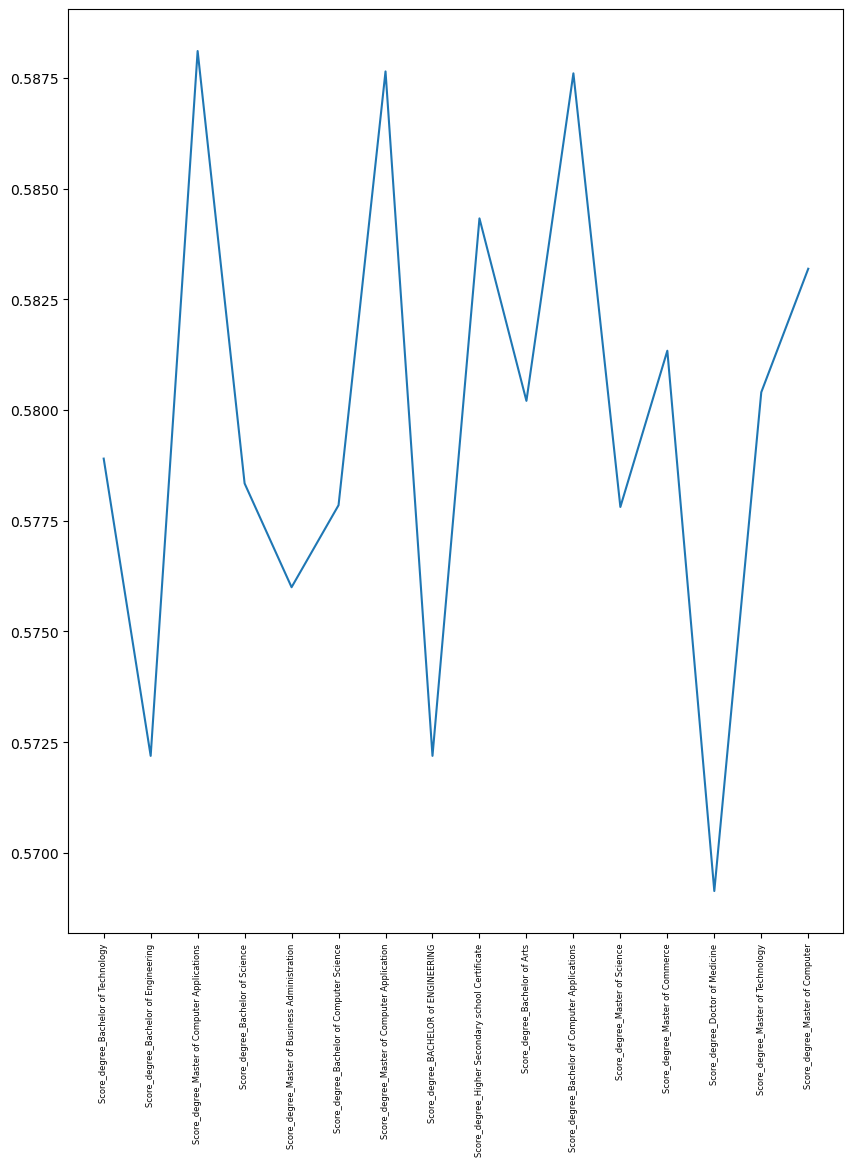

In [200]:
for col in ['gender','institute', 'city', 'employer', 'degree']:
    col_list = []
    for val in df[col].unique().tolist():
        if 'nan' not in str(val):
            col_list.append('Score_'+col+'_'+str(val))
    minimums = []
    maximums = []
    means = []
    for colname in col_list:
        min = df[colname].min()
        max = df[colname].max()
        mean = df[colname].mean()
        minimums.append(min)
        maximums.append(max)
        means.append(mean)
    data = [df[colname] for colname in col_list]
    p_value = f_oneway(*data)[1]
    print(col_list)
    print(minimums)
    print(maximums)
    print(means)
    print(p_value)
    if p_value < 0.05:
        plt.figure(figsize=(10, 12))
        plt.plot(col_list, means,)
        plt.xticks(rotation=90, fontsize = 6)
        plt.show()